In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

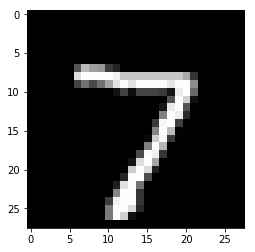

In [9]:
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [13]:
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

In [14]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=784))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 56us/step - loss: 7.3453 - acc: 0.5383 - val_loss: 5.4706 - val_acc: 0.6569
Epoch 2/40
60000/60000 [==============================] - 3s 50us/step - loss: 5.5885 - acc: 0.6503 - val_loss: 5.2989 - val_acc: 0.6687
Epoch 3/40
60000/60000 [==============================] - 3s 50us/step - loss: 5.4998 - acc: 0.6562 - val_loss: 5.2675 - val_acc: 0.6717
Epoch 4/40
60000/60000 [==============================] - 3s 49us/step - loss: 4.7473 - acc: 0.7021 - val_loss: 4.3413 - val_acc: 0.7277
Epoch 5/40
60000/60000 [==============================] - 3s 50us/step - loss: 4.2659 - acc: 0.7329 - val_loss: 4.3798 - val_acc: 0.7256
Epoch 6/40
60000/60000 [==============================] - 4s 66us/step - loss: 4.1524 - acc: 0.7401 - val_loss: 3.9230 - val_acc: 0.7546
Epoch 7/40
60000/60000 [==============================] - 4s 64us/step - loss: 4.1062 - acc: 0.7434 - val_loss: 3.9851 - val_acc

In [17]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/step


In [18]:
print("Accuracy: {0:.2f}%".format(score[1]*100))

Accuracy: 93.57%


In [19]:
y_pred = model.predict(x_test)

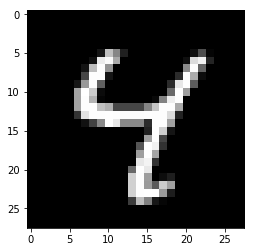

Prediction: 4


In [20]:
image = 6
plt.imshow(x_test[image].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(np.argmax(y_pred[image])))

In [21]:
correct_indices = np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]

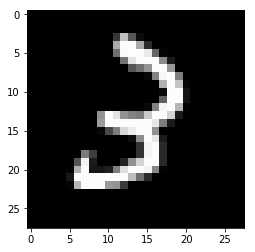

Prediction: 2


In [23]:
image = 4
plt.imshow(x_test[incorrect_indices[image]].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(np.argmax(y_pred[incorrect_indices[image]])))